In [33]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [29]:
wine_data_path = '/Users/ianbenlolo/Desktop/Mcgill/comp_551/project_1/winequality-red.csv'
breast_cancer_data_path = '/Users/ianbenlolo/Desktop/Mcgill/comp_551/project_1/breast-cancer-wisconsin.data'
breast_cancer_names_path = '/Users/ianbenlolo/Desktop/Mcgill/comp_551/project_1/breast-cancer-wisconsin.names'

In [30]:
#open the files

with open(wine_data_path, 'r') as f:
    wines = list(csv.reader(f, delimiter=';'))

wine_headers = wines[0]
wines = np.array(wines[1:], dtype=np.float)


with open(breast_cancer_data_path, 'r') as f:
    cancer = list(csv.reader(f ))
# with open(breast_cancer_names_path,'r') as f:
#     cancer_names = list(csv.reader(f ))
cancer_headers = ['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']


In [119]:
#clean the data and make binary

for i in wines:
    if i[-1] >= 6:
        i[-1] = 1
    else:
        i[-1] = 0


cancer_good = []
j = 0
for i,line in enumerate(cancer):
    try:
        cancer_good.append( [int(x) for x in line])
    except ValueError as e:
        j += 1
        continue
    if cancer_good[i-j][-1] == 2:
        cancer_good[i-j][-1] = 0
    
    elif cancer_good[i-j][-1] == 4:
        cancer_good[i-j][-1] = 1
    
    else:
        print('somethins up..',i)
# make list into numpy array
cancer_good = np.asarray(cancer_good)

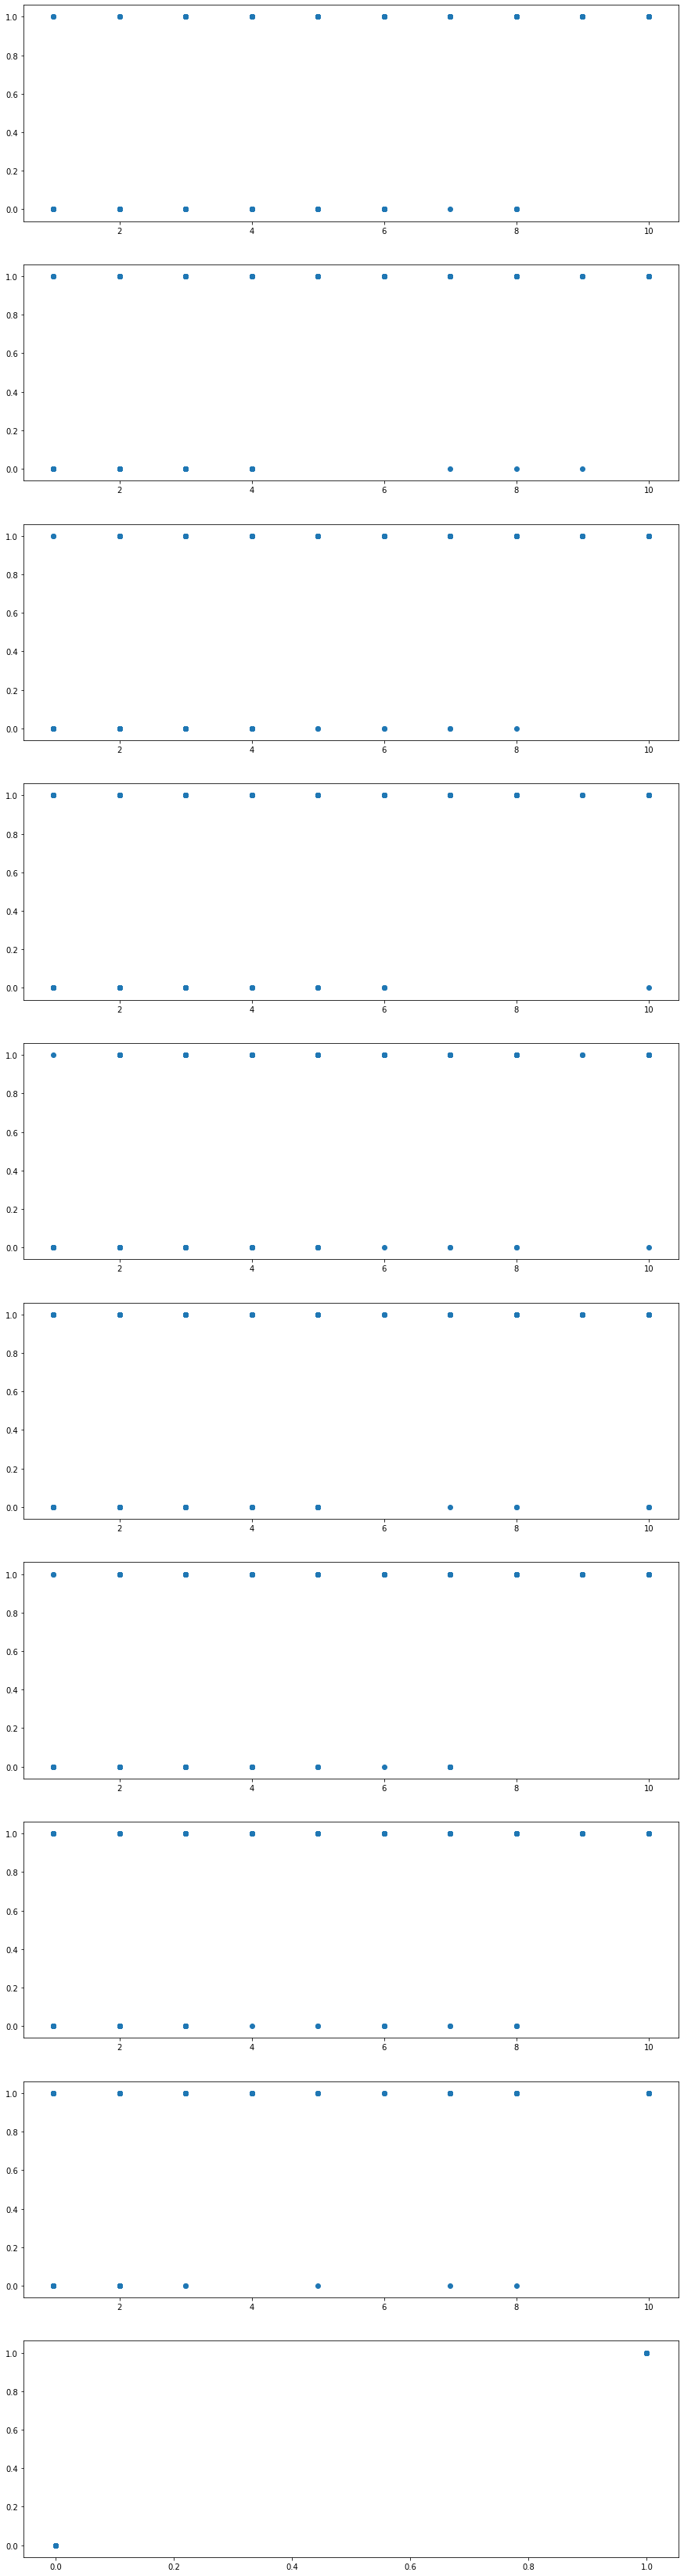

In [83]:
# useless
fig, axs = plt.subplots(len(cancer_headers)-2,1, figsize = (15,60))
for i,ax in enumerate(axs):
    ax.scatter(cancer_good[:,i+1],cancer_good[:,-1] )

Attribute:  Clump Thickness . mean cancerous clump thickness:  7.188284518828452  +-  2.432801643243244 
mean non-cancerous clump thickness:  2.963963963963964  +=  1.6707765251222568 

Attribute:  Uniformity of Cell Size . mean cancerous clump thickness:  6.577405857740586  +-  2.7185385499992076 
mean non-cancerous clump thickness:  1.3063063063063063  +=  0.854693378376896 

Attribute:  Uniformity of Cell Shape . mean cancerous clump thickness:  6.560669456066946  +-  2.563723668755376 
mean non-cancerous clump thickness:  1.4144144144144144  +=  0.9559530734879949 

Attribute:  Marginal Adhesion . mean cancerous clump thickness:  5.585774058577406  +-  3.1899368652342637 
mean non-cancerous clump thickness:  1.3468468468468469  +=  0.916054978858725 

Attribute:  Single Epithelial Cell Size . mean cancerous clump thickness:  5.326359832635983  +-  2.4379701525372974 
mean non-cancerous clump thickness:  2.108108108108108  +=  0.8761232311955693 

Attribute:  Bare Nuclei . mean canc

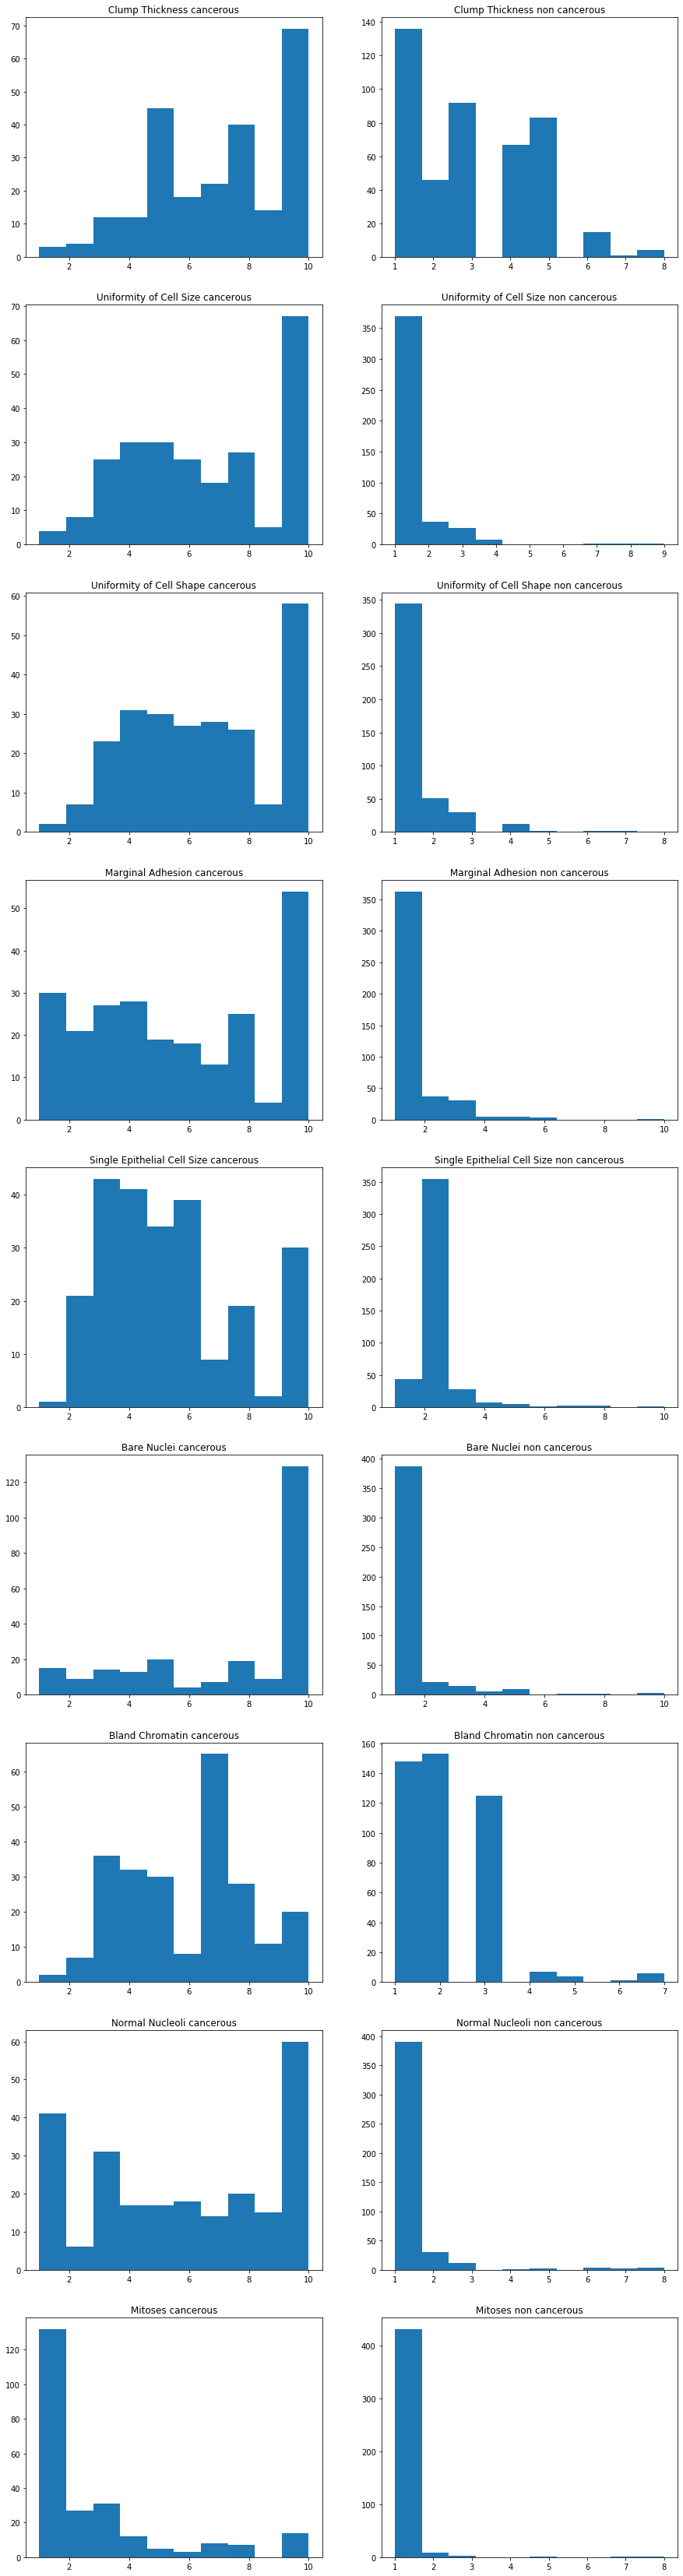

In [120]:
# plot histograms for each attribute

fig, axs = plt.subplots(len(cancer_headers)-2,2, figsize = (15,60))

for i,attribute in enumerate(cancer_headers[1:-1]):
    
    index = i+1 #since it starts at 0 but out cancer_good array has 'id number' as first col
    cancerous_attribute = [x for j,x in  enumerate(cancer_good[:,index]) if  cancer_good[j,-1] == 1]
    non_cancerous_attribute = [x for j,x in  enumerate(cancer_good[:,index]) if  cancer_good[j,-1] == 0]
    
    axs[i][0].hist(cancerous_attribute)
    axs[i][0].set_title(f'{attribute} cancerous')
    
    axs[i][1].hist(non_cancerous_attribute)
    axs[i][1].set_title(f'{attribute} non cancerous')
    
    
    mean_attribute_bad = np.mean(cancerous_attribute)
    mean_attribute_good = np.mean(non_cancerous_attribute)

    std_attribute_bad = np.std(cancerous_attribute)
    std_attribute_good = np.std(non_cancerous_attribute)

    print('Attribute: ',attribute,'. mean cancerous clump thickness: ',mean_attribute_bad,' +- ',std_attribute_bad, '\nmean non-cancerous clump thickness: ',mean_attribute_good,' += ',std_attribute_good,'\n')


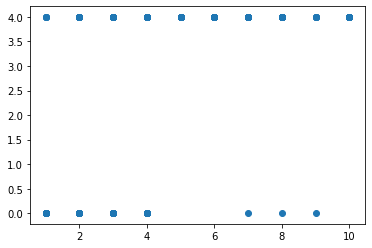

In [57]:
plt.scatter(cancer_good[:,2],cancer_good[:,-1])

In [66]:
[x for i,x in  enumerate(cancer_good[:,1]) if  cancer_good[i,-1] == 1]

[]

In [110]:
for i,attribute in enumerate(cancer_headers[1:-1]):
    index = i+1
    print(index,' ',attribute)

1   Clump Thickness
2   Uniformity of Cell Size
3   Uniformity of Cell Shape
4   Marginal Adhesion
5   Single Epithelial Cell Size
6   Single Epithelial Cell Size
7   Bare Nuclei
8   Bland Chromatin
9   Normal Nucleoli
10   Mitoses


In [117]:
len(cancer_headers)

12